In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [12]:
# TODO Take the dash out of the name to avoid this hackery
import importlib  
rq = importlib.import_module("range-query")

In [13]:
def epsilon_gen(num):
    epsilons = np.geomspace(0.2,1,num)
    return np.delete(epsilons, 0)

In [14]:
adult = pd.read_csv('https://github.com/jnear/cs3110-data-privacy/raw/main/homework/adult_with_pii.csv')

In [15]:
lst = rq.build_tree(0, 100)
df = adult['Age']
tree=rq.counts(lst,df)
noisy_tree = rq.noisy_counts(tree, 1.0)

In [16]:
def create_workload(low: int, high: int, n: int) -> list[(int, int)]:
    result = []
    for _ in range(n):
        a = np.random.randint(low, high)
        result.append((a, np.random.randint(a, high)))

    return result

In [17]:
def control_query(series: pd.Series, a: int, b: int, epsilon: float) -> int:
    np.sum(series)

In [18]:
workloads = create_workload(0, 100, 50)

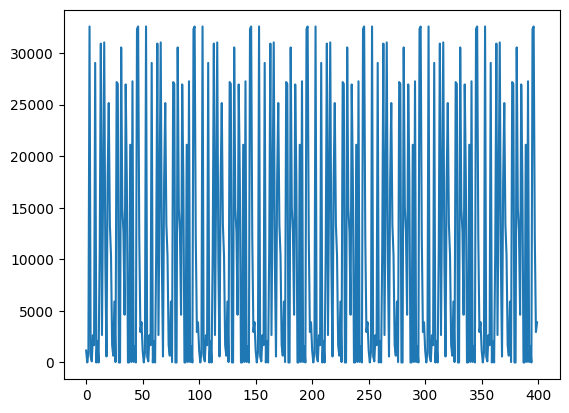

In [19]:
lst = rq.build_tree(0, 100)
df = adult['Age']
lst=rq.counts(lst,df)
pl=[]
epsilons=rq.epsilon_gen(10)
epsilons = np.delete(epsilons, 0)
for epsilon in epsilons:
    for workload in workloads:    
        noisy_tree=rq.noisy_counts(lst,epsilon)        
        pl.append(rq.query(noisy_tree, workload[0], workload[1]))
        
plt.plot(pl)

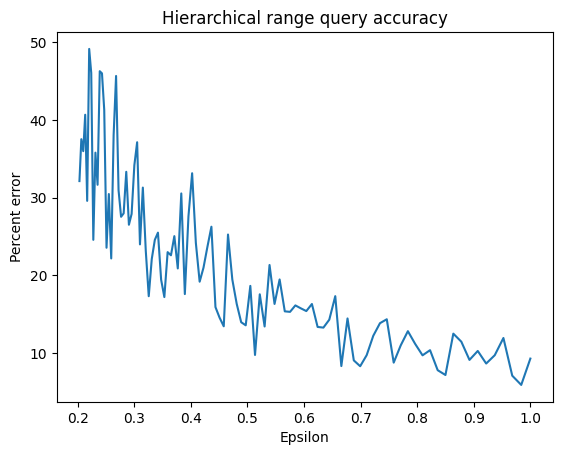

In [21]:
epsilons=epsilon_gen(100)
workloads = create_workload(0, 100, 10000)
ys = []
for epsilon in epsilons:
    noisy_tree = rq.noisy_counts(lst, epsilon)
    pct_errs = []
    for workload in workloads:
        true_cnt = rq.query(noisy_tree, workload[0], workload[1])
        noisy_cnt = rq.noisy_query(noisy_tree, workload[0], workload[1])
        if true_cnt > 0:
            pct_err=np.abs(true_cnt - noisy_cnt) / true_cnt * 100
            if pct_err :
                pct_errs.append(pct_err)
    #print(pct_errs)
    pct_err = sum(pct_errs) / len(pct_errs)
    ys.append(pct_err)

plt.plot(epsilons, ys)
plt.title('Hierarchical range query accuracy')
plt.xlabel('Epsilon')
plt.ylabel('Percent error')
plt.show()